# Famous Faces - Results

### import modules

In [1]:
import sys

import numpy as np
import pandas as pd
from scipy import stats
from PIL import Image

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

sys.path.append('../modules/')
import case_stats as cs

### get all files and merge them

In [2]:
def makeBigDf():
    bigDf = pd.DataFrame()
    for csv in ['../famousFiltered/output/filteredName.csv',
                '../famousInner/output/innerName.csv',
                '../famousInner/output/innerChoice.csv',
                '../famousFiltered/output/filteredChoice.csv'
    ]:
        thisDf = pd.read_csv(csv,index_col=[0],header=[0,1])
        bigDf = pd.concat([bigDf,thisDf],axis=1)
    bigDf = bigDf.sort_index(axis=1)
    idx = [x if x.startswith('JB') else 'con' for x in bigDf.index  ]
    bigDf.index = [idx,bigDf.index]
    bigDf.dropna(inplace=True)
    
    bigDf = bigDf.reindex(level=1,columns=['familiarity', 'context', 'naming'])
    
    return bigDf

In [3]:
bigDf = makeBigDf()

In [4]:
bigDf

edges                                gray              \
        familiarity     context      naming familiarity     context   
con 1    100.000000  100.000000   78.571429  100.000000  100.000000   
    10    91.666667   96.666667   83.333333   98.333333  100.000000   
    11    52.083333   66.666667   16.666667   66.666667   72.916667   
    12    91.666667   93.750000   64.583333   91.666667   95.833333   
    13    80.555556   97.222222   61.111111   94.444444   91.666667   
    14    84.313725   70.588235   36.842105   78.431373   78.431373   
    15    81.481481   87.037037   70.370370   92.592593   90.740741   
    16   100.000000  100.000000   70.000000   98.333333  100.000000   
    17    75.925926   83.333333   29.824561   87.037037   88.888889   
    18   100.000000   94.444444   94.444444  100.000000   98.148148   
    19    75.925926   94.444444   64.814815   85.185185   98.148148   
    2     92.982456  100.000000   78.947368   92.982456  100.000000   
    20    95.454545   95.454545   63.636364   96.969697   93.939394   
    21    95.238095  100.000000   61.904762   95.238095   98.412698   
    22    98.412698   96.825397   71.428571  100.000000   96.825397   
    23   100.000000  100.000000   81.481481  100.000000   98.148148   
    24    95.652174   94.202899   71.014493  100.000000   97.101449   
    25   100.000000  100.000000   68.115942  100.000000   98.550725   
    26   100.000000  100.000000  100.000000   98.333333   96.666667   
    27    97.619048   97.619048   76.190476   97.619048  100.000000   
    4    100.000000  100.000000   58.333333  100.000000   98.611111   
    5    100.000000   98.611111   62.500000  100.000000   98.611111   
    6     94.444444   92.592593   50.000000  100.000000   98.148148   
    7    100.000000   98.148148   83.333333  100.000000   96.296296   
    8     89.393939   90.909091   72.727273   90.909091   95.454545   
    9     98.484848  100.000000   62.121212   98.484848   96.969697   
JB  JB    69.696970   81.818182   60.606061   93.939394   93.939394   
JB* JB*   91.666667   97.222222   91.666667  100.000000  100.000000   

                          inner                              smoo              \
             naming familiarity    context     naming familiarity     context   
con 1     76.190476   65.600000  79.200000  46.400000   90.476190  100.000000   
    10    85.000000   91.875000  89.375000  71.250000   95.000000   98.333333   
    11    25.000000   40.000000  50.000000  21.818182   52.083333   60.416667   
    12    68.750000   77.692308  69.230769  46.153846   72.916667   75.000000   
    13    66.666667   86.315789  89.473684  69.473684   80.555556   91.666667   
    14    45.614035   71.538462  66.153846  12.142857   84.313725   64.705882   
    15    74.074074   61.481481  71.851852  50.370370   87.037037   92.592593   
    16    70.000000   92.941176  98.823529  73.529412   98.333333   98.333333   
    17    35.087719   74.814815  72.592593  35.714286   70.370370   70.370370   
    18    94.444444   74.285714  85.142857  62.285714   96.296296   94.444444   
    19    74.074074   55.333333  76.666667  47.333333   66.666667   94.444444   
    2     78.947368   83.125000  87.500000  70.000000   91.228070   98.245614   
    20    66.666667   81.212121  86.666667  50.909091   89.393939   93.939394   
    21    61.904762   93.333333  95.000000  57.777778   93.650794  100.000000   
    22    74.603175   96.111111  97.222222  58.333333   98.412698   96.825397   
    23    83.333333   65.925926  81.481481  17.777778   85.185185   96.296296   
    24    72.463768   85.641026  87.692308  54.358974   98.550725   97.101449   
    25    68.115942   83.333333  86.111111  55.555556   98.550725   98.550725   
    26   100.000000   90.857143  90.285714  77.714286   95.000000   91.666667   
    27    78.571429   73.043478  80.869565  57.391304   92.857143   88.095238   
    4     58.333333   98.048780  93.170732  49.268293  100.000000  100.000000   
    5     62.500000 

save to csv

In [5]:
bigDf.to_csv('../famousInner/output/famousFacesResults.csv')

### collect and save main results

In [15]:
innerDf = bigDf.loc[:,'inner'].copy()
innerDf.index = [[x,'JB'][x=='JB'] for x in innerDf.index.get_level_values(1)]
innerDf

,familiarity,context,naming
1,65.600000,79.200000,46.400000
10,91.875000,89.375000,71.250000
11,40.000000,50.000000,21.818182
12,77.692308,69.230769,46.153846
13,86.315789,89.473684,69.473684
14,71.538462,66.153846,12.142857
15,61.481481,71.851852,50.370370
16,92.941176,98.823529,73.529412
17,74.814815,72.592593,35.714286
18,74.285714,85.142857,62.285714


raw data

In [16]:
raw_df = innerDf.loc[['JB']].T
raw_df.columns = ['% correct']
raw_df

,% correct
familiarity,31.304348
context,58.260870
naming,13.913043


percentile score

In [17]:
percentile_df = cs.make_percentile_df(innerDf,'JB')
percentile_df

,percentile,z
familiarity,0.016127,-3.596492
context,0.810858,-2.403991
naming,0.836081,-2.392772


ttest results

In [18]:
ttest_df = cs.make_tstats_df(innerDf,'JB')
ttest_df

,t,df,p
context,-2.32,26,0.029
familiarity,-3.47,26,0.002
naming,-2.31,26,0.029


Save everything in one table

In [10]:
result_df = pd.concat([raw_df, percentile_df, ttest_df],axis=1)
# add hierarchy to index
result_df.index = [['Face recognition']*result_df.shape[0], ['Famous %s'%x for x in result_df.index] ]
result_df

% correct  percentile         z      t  \
Face recognition Famous context      58.260870    0.810858 -2.403991  -2.32   
                 Famous familiarity  31.304348    0.016127 -3.596492  -3.47   
                 Famous naming       13.913043    0.836081 -2.392772  -2.31   

                                     df      p  
Face recognition Famous context      26  0.029  
                 Famous familiarity  26  0.002  
                 Famous naming       26  0.029

Save to file

In [11]:
result_df.to_csv('../reports/tables/facesfamous_main_results.csv')

### results for the filtered faces

In [27]:
for c in bigDf.columns.levels[0]:
    thisDf = bigDf.loc[:,c].copy()
    thisDf.index = [[x,'JB'][x=='JB'] for x in thisDf.index.get_level_values(1)]
    raw_df = thisDf.loc[['JB']].T
    raw_df.columns = ['% correct']

    percentile_df = cs.make_percentile_df(thisDf,'JB')
    print '\n********',c,'********\n',percentile_df.round(3)


******** edges ********
             percentile      z
familiarity       1.966 -2.061
context           6.760 -1.494
naming           35.139 -0.382

******** gray ********
             percentile      z
familiarity      44.868 -0.129
context          40.253 -0.247
naming           80.878  0.873

******** inner ********
             percentile      z
familiarity       0.016 -3.596
context           0.811 -2.404
naming            0.836 -2.393

******** smoo ********
             percentile      z
familiarity       1.088 -2.294
context          18.298 -0.904
naming           17.194 -0.947


## plotting

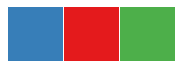

In [12]:
myPalette = sns.color_palette('Set1',3)
myPalette = [myPalette[x] for x in [1,0,2]]
sns.palplot(myPalette)

In [13]:
def makeSubPlot(cond,ax,bigDf=bigDf,myPalette=myPalette):
    snsDf = pd.DataFrame(bigDf[cond].stack())
    snsDf.columns = ['% correct']
    snsDf['group'] = [snsDf.index.levels[0][x] for x in snsDf.index.labels[0]]
    snsDf[''] = [snsDf.index.levels[2][x] for x in snsDf.index.labels[2]]
    ax = sns.swarmplot(data=snsDf,y='% correct',x='',hue='group',size=10,alpha=0.8,ax=ax,palette=myPalette)
    
    condDict = {'gray':'Original','edges':'HPF','smoo':'LPF'}
    ax.set_title(condDict[cond])
    ax.set_ylim(0,102)
    ax.legend([])
    return ax

In [14]:
sns.set_context('poster')
sns.set_style('white')

In [15]:
condDf = bigDf['inner']
condDf = condDf[['familiarity', 'context', 'naming']]

snsDf = pd.DataFrame(condDf.stack())
snsDf.columns = ['% correct']
snsDf['group'] = [snsDf.index.levels[0][x] for x in snsDf.index.labels[0]]
snsDf[''] = [snsDf.index.levels[2][x] for x in snsDf.index.labels[2]]

In [16]:
msFamFig,ax = plt.subplots(1,1,figsize=(7,5))
ax = sns.swarmplot(data=snsDf,y='% correct',x='',hue='group',
                   size=15,alpha=0.8,edgecolor='white',linewidth=1,ax=ax,palette=myPalette)
ax.set_title('')
ax.set_ylim(0,102)
ax.legend([])
ax.legend(bbox_to_anchor=(1.21,1))
plt.tight_layout()
sns.despine()
plt.close()

In [17]:
msFamFig.savefig('../famousInner/output/famFace.png',bbox_inches='tight',dpi=300)

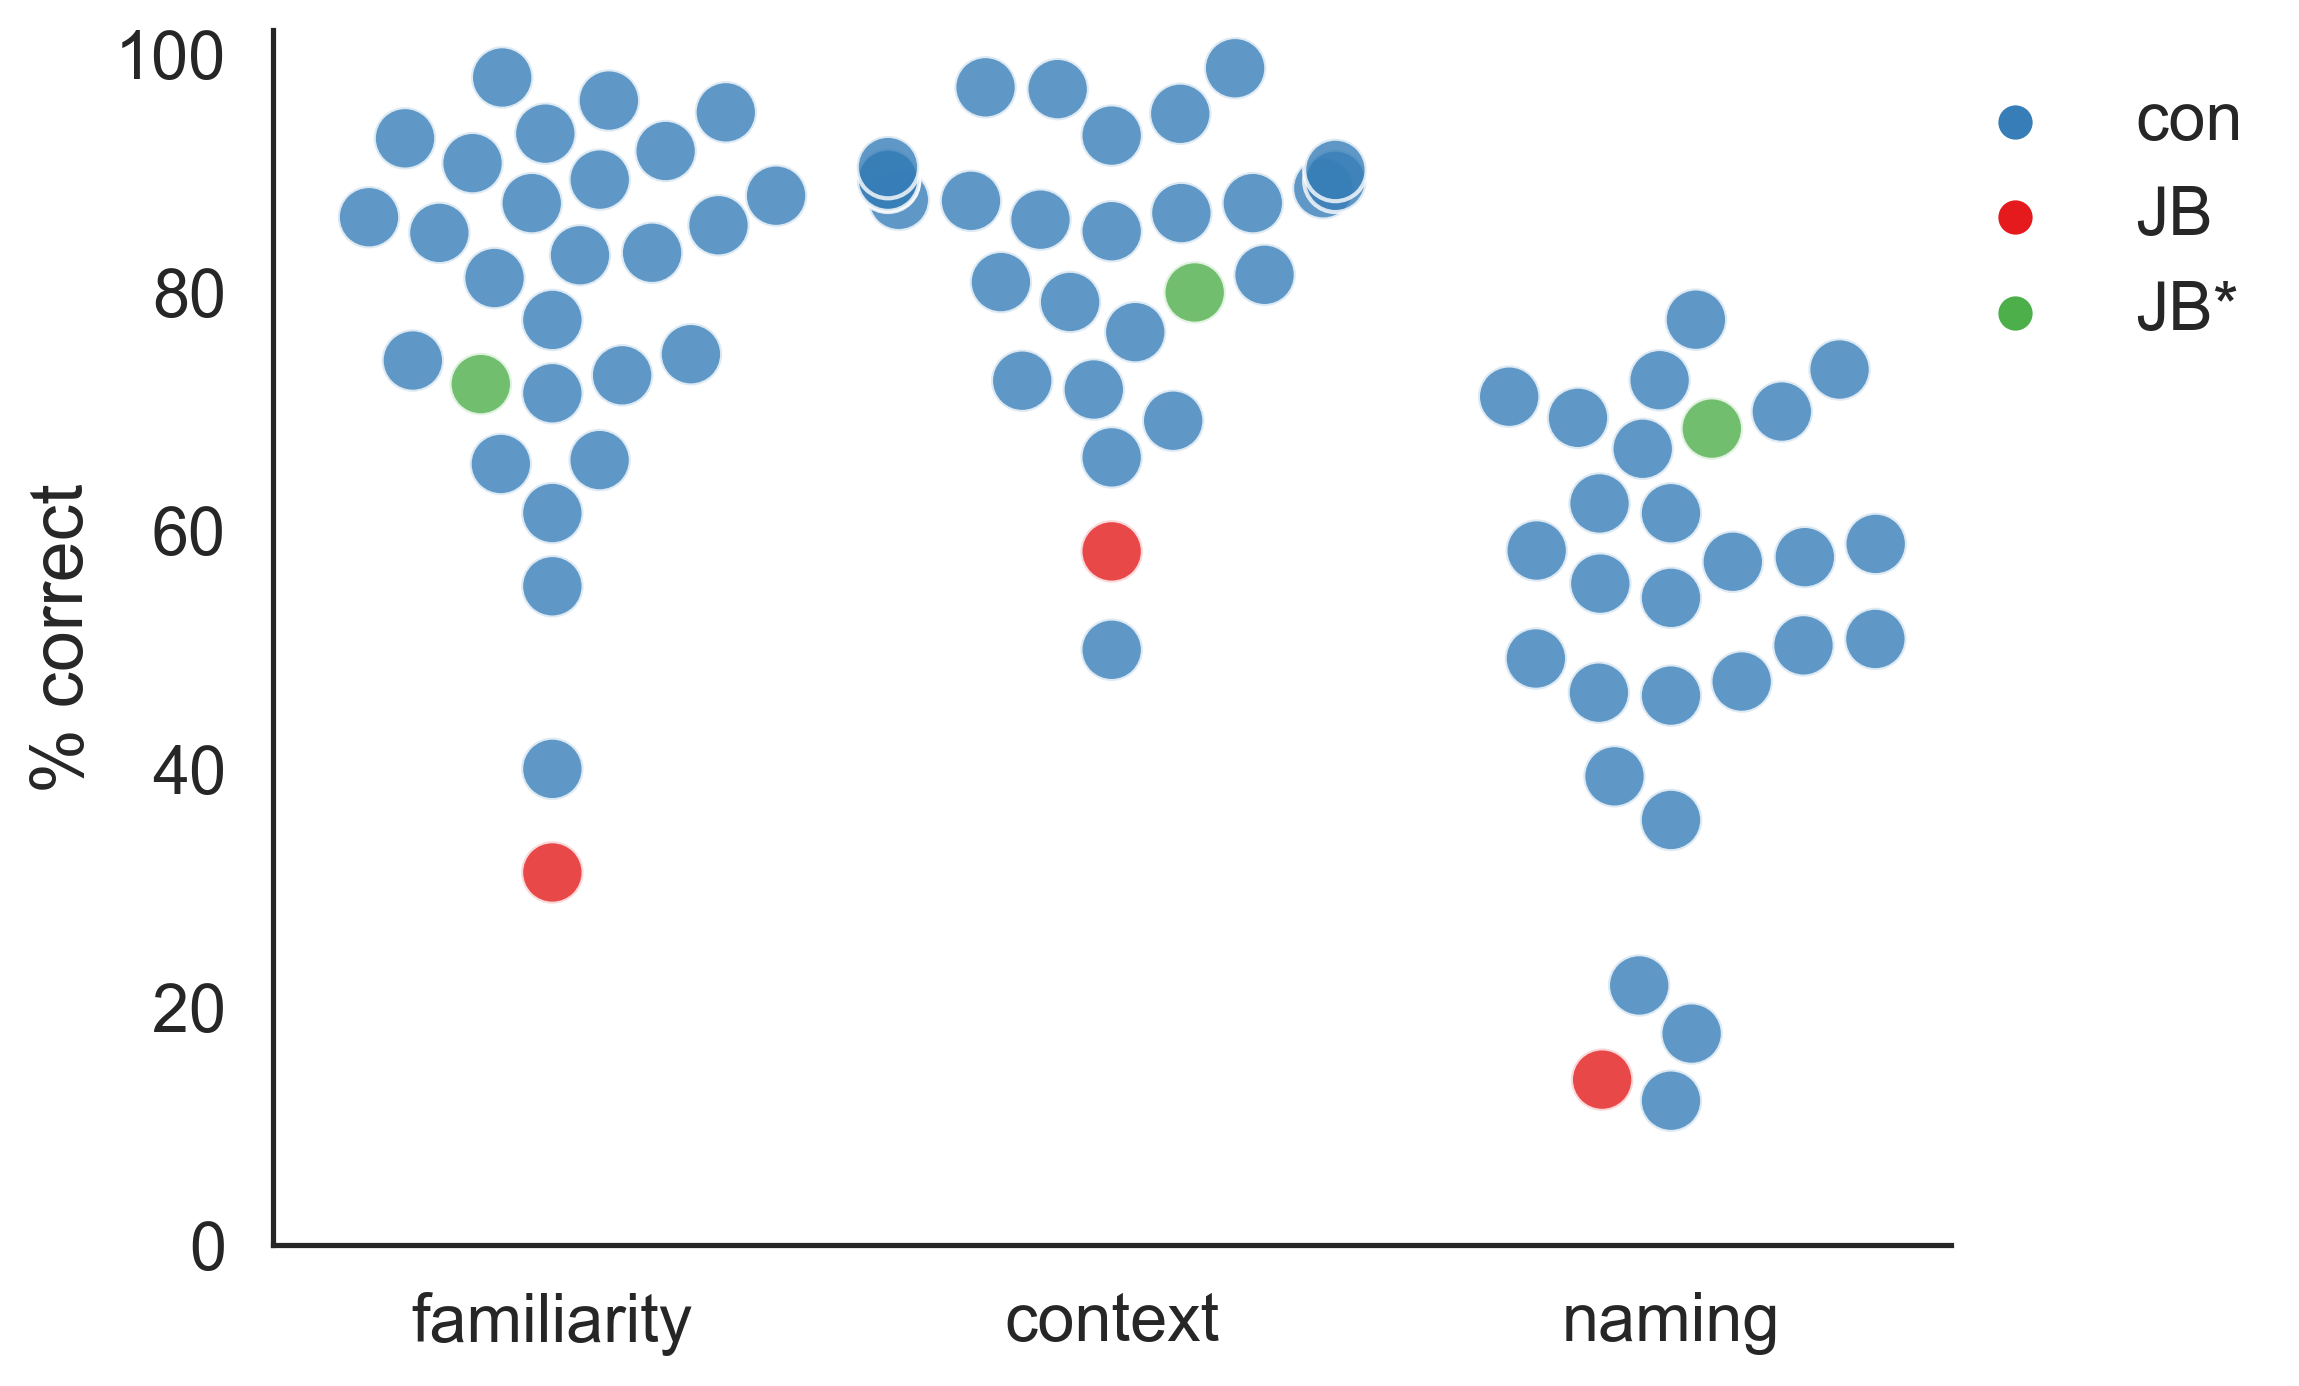

In [18]:
Image.open('../famousInner/output/famFace.png')

In [19]:
sns.set_style('dark')

In [20]:
msFig,(ax1,ax2) = plt.subplots(2,1)

ax1 = plt.subplot2grid((10, 1), (0, 0),rowspan=3)
ax1.imshow( Image.open('../famousInner/experiment/greyInner/BarackObama1_3_cut.png') )
ax1.set_xticks([]);ax1.set_yticks([])

ax2 = plt.subplot2grid((10, 1), (3, 0),rowspan=7 )
ax2.imshow( Image.open('../famousInner/output/famFace.png','r'))
ax2.set_xticks([]);ax2.set_yticks([])
plt.tight_layout()

plt.close()

In [21]:
msFig.savefig('../reports/figures/famface_main_figure.png',bbox_inches='tight',dpi=300)

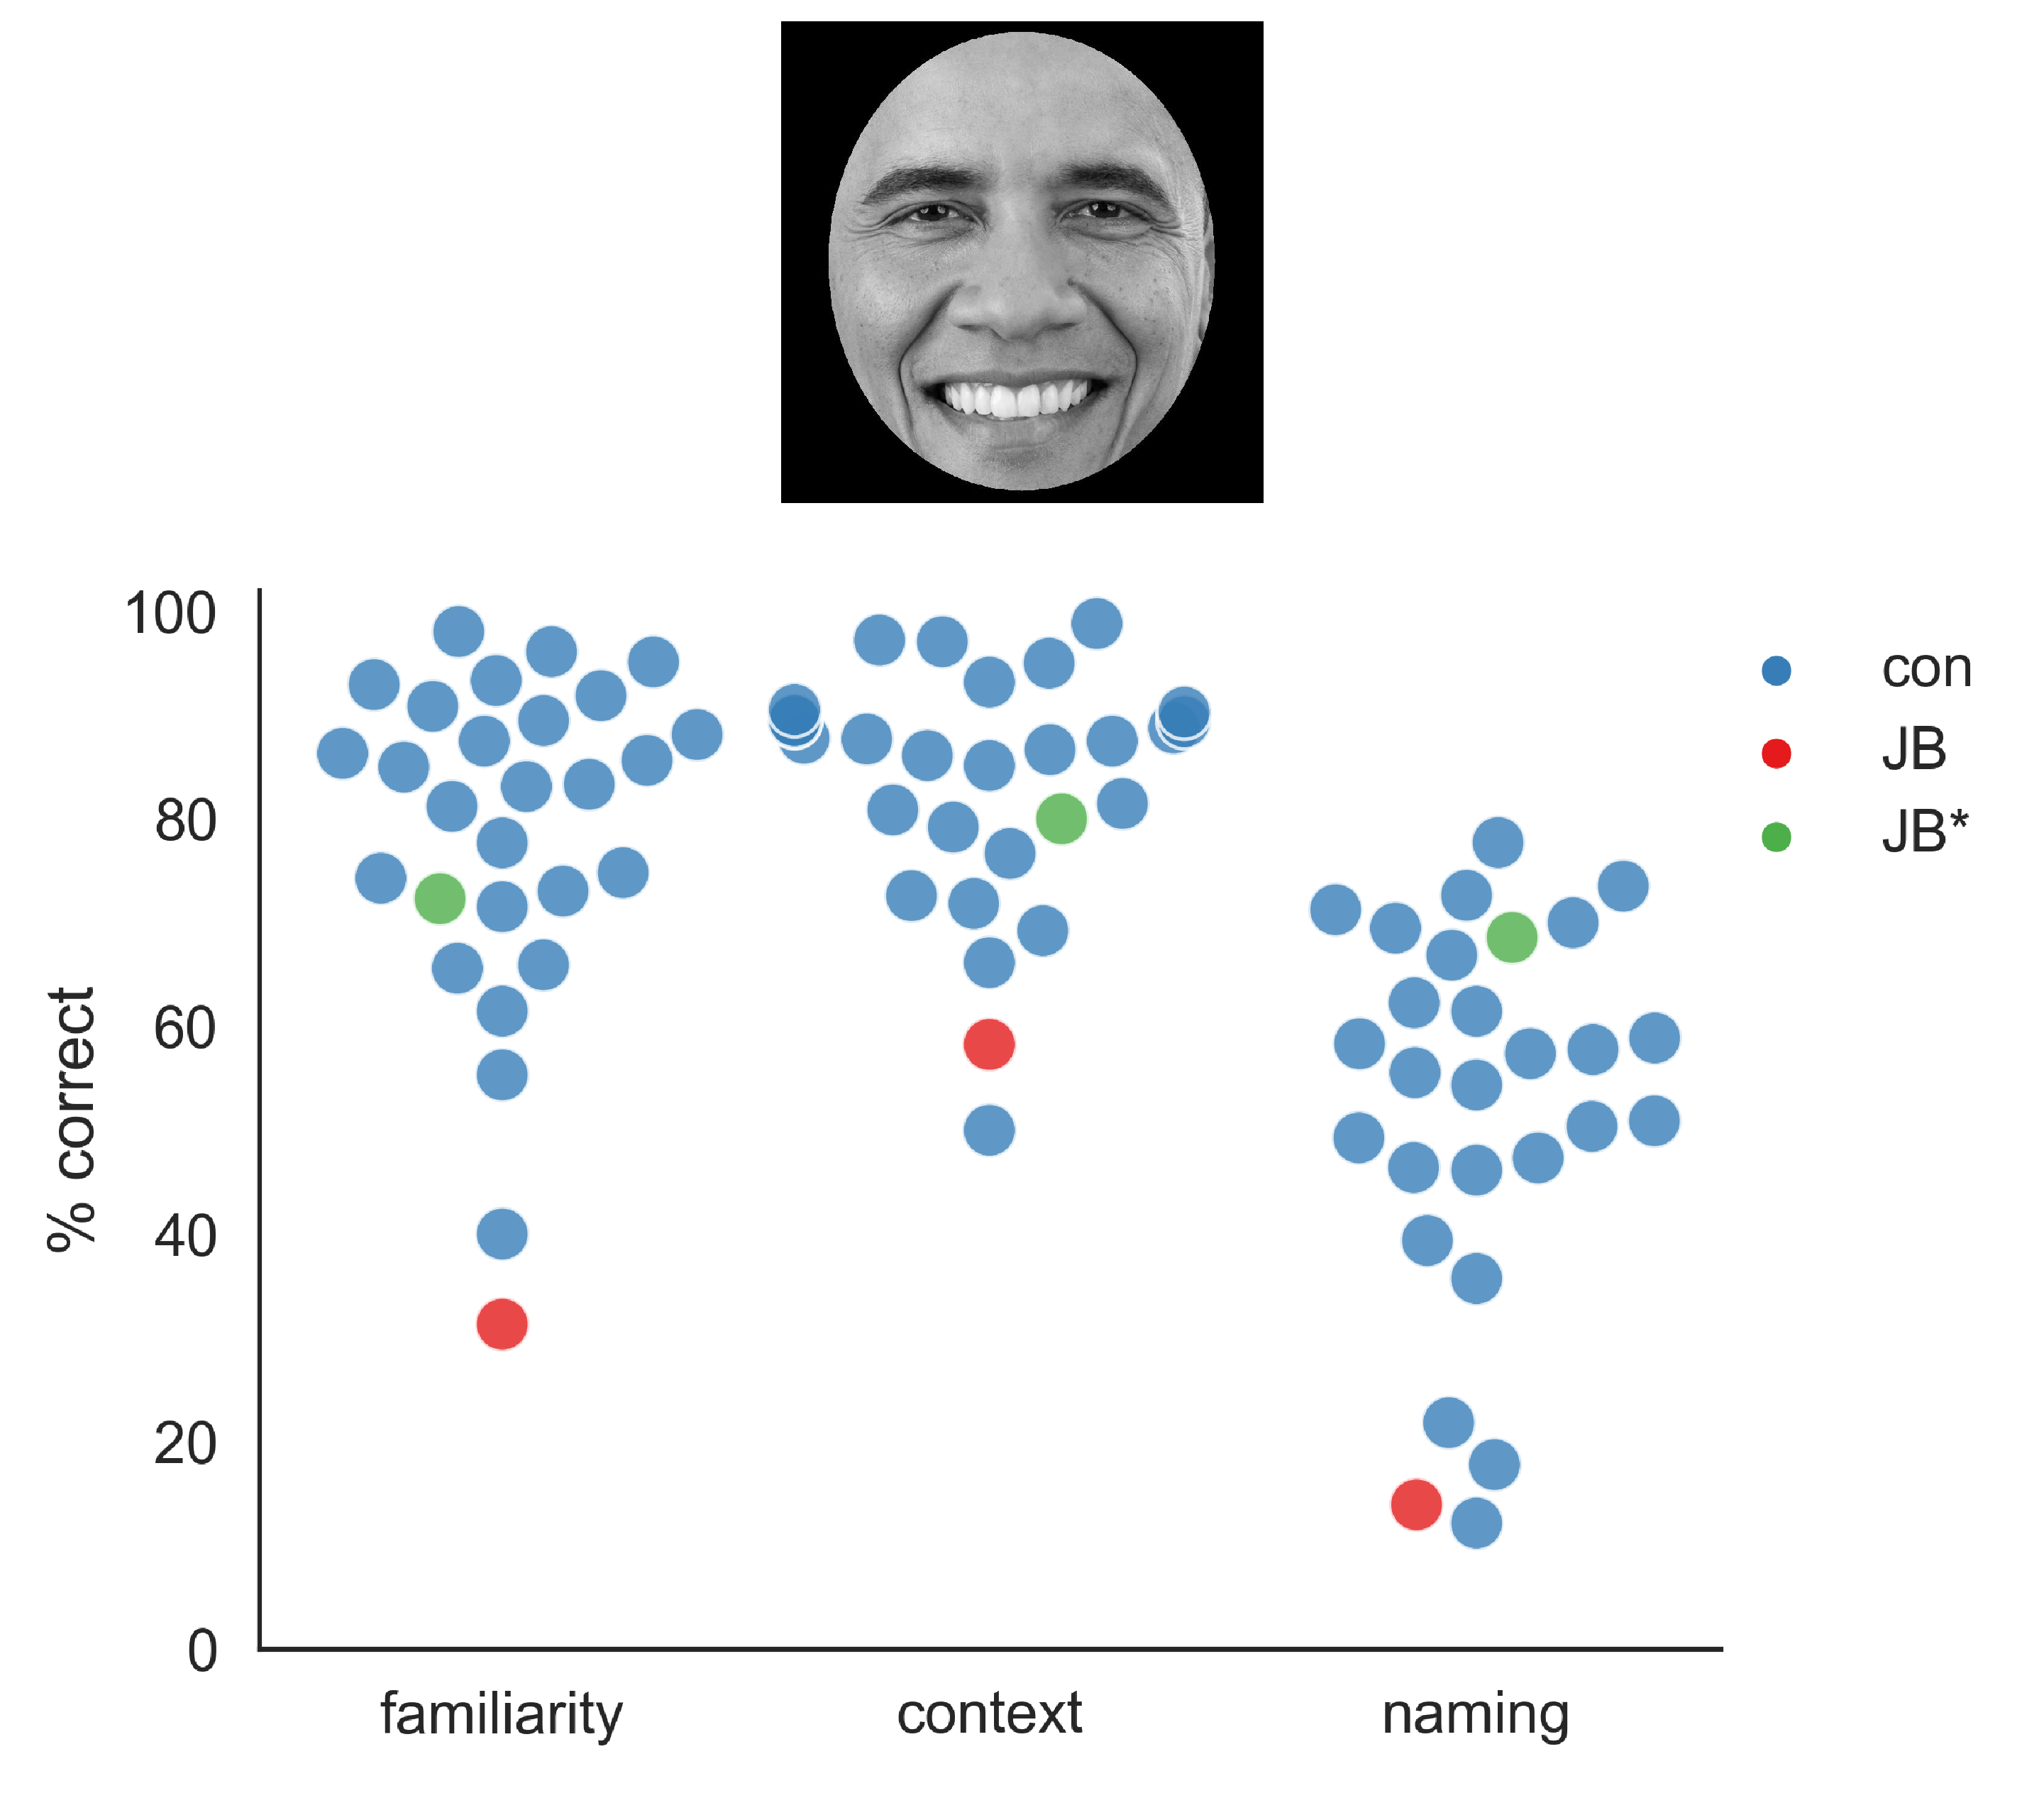

In [22]:
Image.open('../reports/figures/famface_main_figure.png')

In [23]:
sns.set_style('white')

In [24]:
filterFig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,5))
ax1 = makeSubPlot('gray',ax1)
ax2 = makeSubPlot('edges',ax2)
ax3 = makeSubPlot('smoo',ax3)
ax3.legend(bbox_to_anchor=(1.4,1))
sns.despine()
plt.tight_layout()
plt.close()

In [25]:
filterFig.savefig('../famousFiltered/output/filterFace.png',bbox_inches='tight',dpi=300)

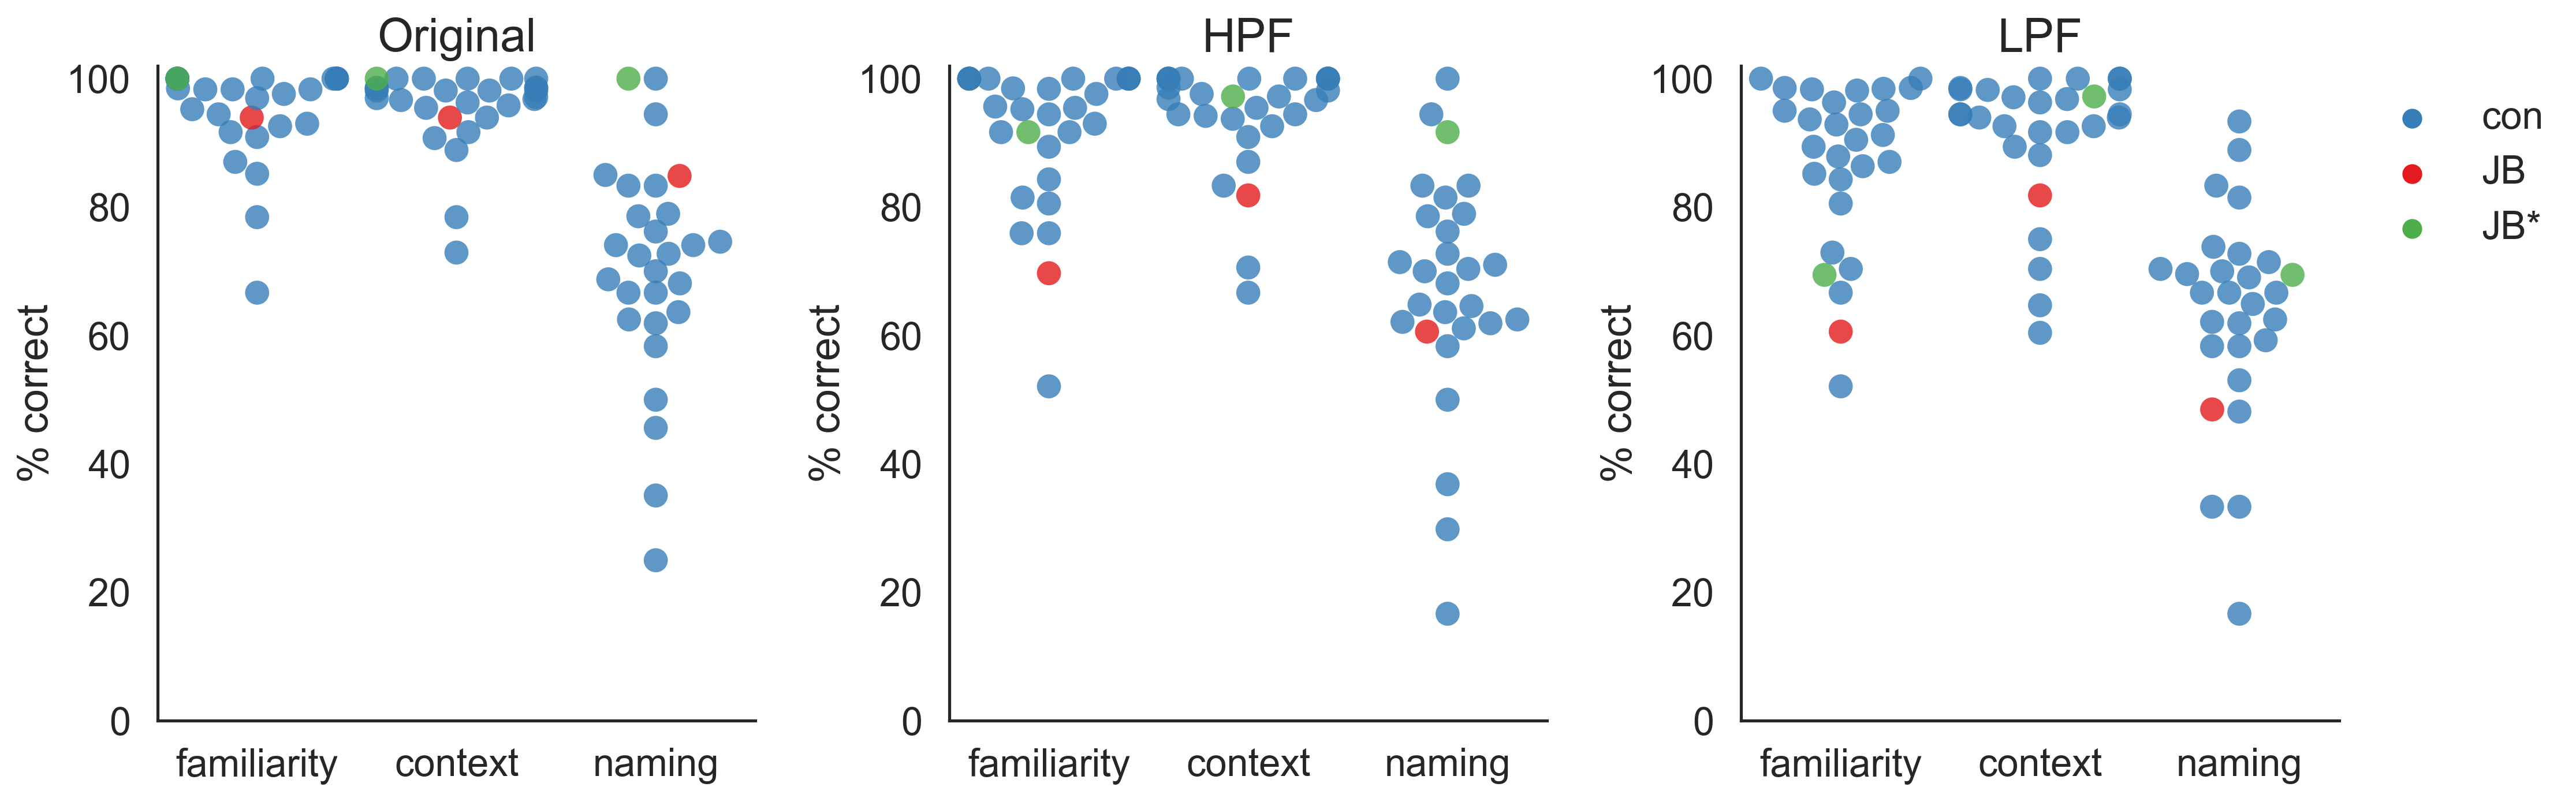

In [26]:
Image.open('../famousFiltered/output/filterFace.png')

In [27]:
sns.set_style('dark')
msFig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)

ax1 = plt.subplot2grid((10, 9), (0, 0),rowspan=3,colspan=3)
ax1.imshow( Image.open('../famousFiltered/experiment/img/gray_BarackObama1_3.png').convert('RGB') )
ax1.set_xticks([]);ax1.set_yticks([])

ax2 = plt.subplot2grid((10, 9), (0, 3),rowspan=3,colspan=3)
ax2.imshow( Image.open('../famousFiltered/experiment/img/edges5_BarackObama1_3.png','r').convert('RGB') )
ax2.set_xticks([]);ax2.set_yticks([])

ax3 = plt.subplot2grid((10, 9), (0, 6),rowspan=3,colspan=3)
ax3.imshow( Image.open('../famousFiltered/experiment/img/smoo15_BarackObama1_3.png','r').convert('RGB') )
ax3.set_xticks([]);ax3.set_yticks([])

ax4 = plt.subplot2grid((10, 9), (3, 0),rowspan=7,colspan=9 )
ax4.imshow( Image.open('../famousFiltered/output/filterFace.png','r'))

ax4.set_xticks([]);ax4.set_yticks([])
plt.tight_layout()

plt.close()

In [28]:
msFig.savefig('../reports/figures/filterface_main_figure.png',bbox_inches='tight',dpi=300)

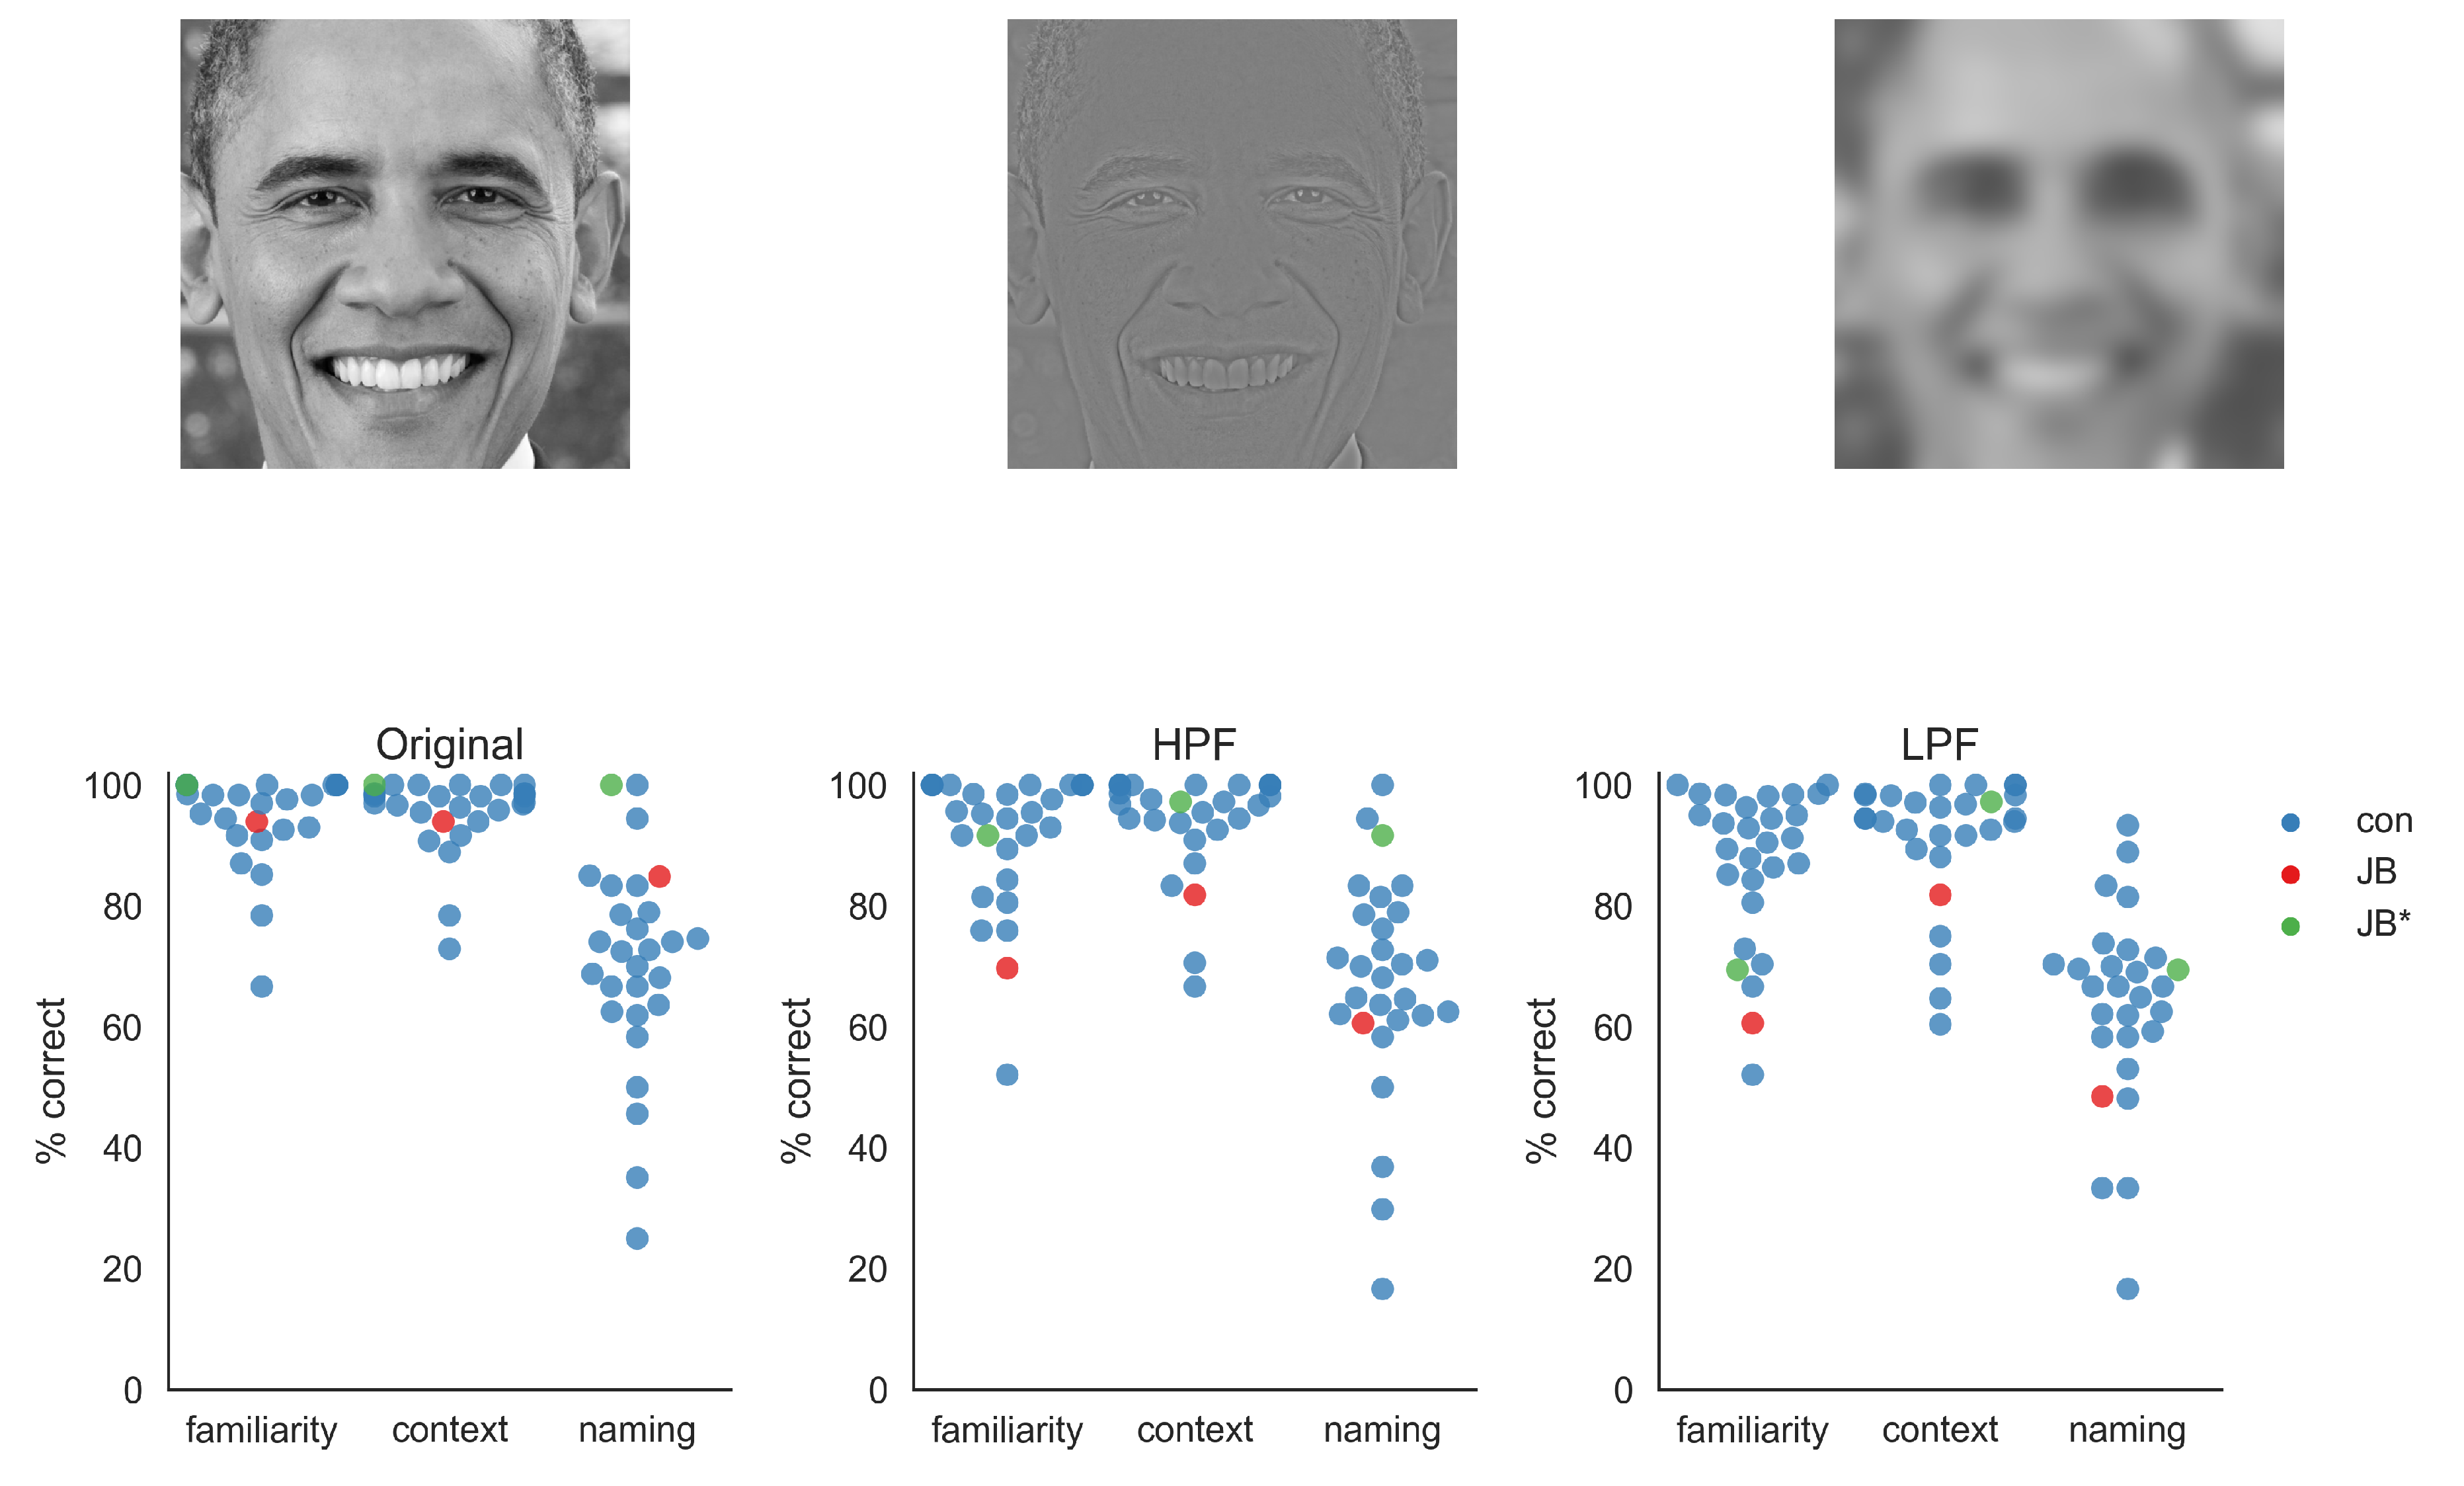

In [29]:
Image.open('../reports/figures/filterface_main_figure.png')